In [31]:
from redd_parameters import *
import redd_parameters
import pandas as pd
import matplotlib.pyplot as plt
import time
import argparse
import os
import pdb
import json


In [32]:
os.getcwd()

'/Users/shalinimustala/Documents/PPDS_coursework/DSCI560/Energy_disaggregation/Mypreprocessing_folder/transferNILM-master/dataset_management/redd'

**Create a common test set (house 1)**

In [75]:
#path for test set (microwave)
path2 = '/Users/shalinimustala/Documents/PPDS_coursework/DSCI560/Energy_disaggregation/seq2point-nilm/saved_microwave_ws11/REDDmicrowave_test_.csv'
#extracting just the first column and filling the second column with zeros
mainsandapp = pd.read_csv(path2)
mainsandapp.columns = ["mains", "appliance"]
import numpy as np
mainsandapp["dummy"] = np.zeros(len(mainsandapp))
mains_new = mainsandapp[["mains", "dummy"]]


In [68]:
mains_new.head()

,mains,dummy
0,-0.221414,0.0
1,-0.222012,0.0
2,-0.220986,0.0
3,-0.219377,0.0
4,-0.219928,0.0


In [69]:
saved_path = '/Users/shalinimustala/Documents/PPDS_coursework/DSCI560/Energy_disaggregation/seq2point-nilm/saved_best/test_mains.csv'
mains_new.to_csv(saved_path, index=False, header=False)

**Plotting results.csv**

In [76]:
path_results = '/Users/shalinimustala/Documents/PPDS_coursework/DSCI560/Energy_disaggregation/seq2point-nilm/saved_best/results.csv'
offset_microwave = 5
offset_dishwasher = 100
df = pd.read_csv(path_results)
#results = df.to_numpy()
df.head()
len(df)

38000

In [77]:
df.describe()

,time,mains,microwave,dishwasher
count,38000.000000,38000.000000,38000.000000,38000.000000
mean,19000.500000,302.782596,15.148760,20.583698
std,10969.799451,354.404111,69.417822,86.931915
min,1.000000,94.302422,0.000000,0.000000
25%,9500.750000,169.532302,4.927765,1.798004
50%,19000.500000,211.905072,5.664139,2.932037
75%,28500.250000,348.442176,6.920151,4.041077
max,38000.000000,5836.941368,948.579200,914.023200


In [79]:
df.isna().sum()

time          0
mains         0
microwave     0
dishwasher    0
dtype: int64

In [78]:
df.head()

,time,mains,microwave,dishwasher
0,1,341.282232,6.864014,15.292175
1,2,342.117396,6.868164,14.658569
2,3,343.427122,6.872284,13.173767
3,4,342.978608,6.875854,12.070923
4,5,344.797898,6.878509,10.253418


In [72]:
190000/len(df)

5.0

Text(0.5, 0, 'Testing Window')

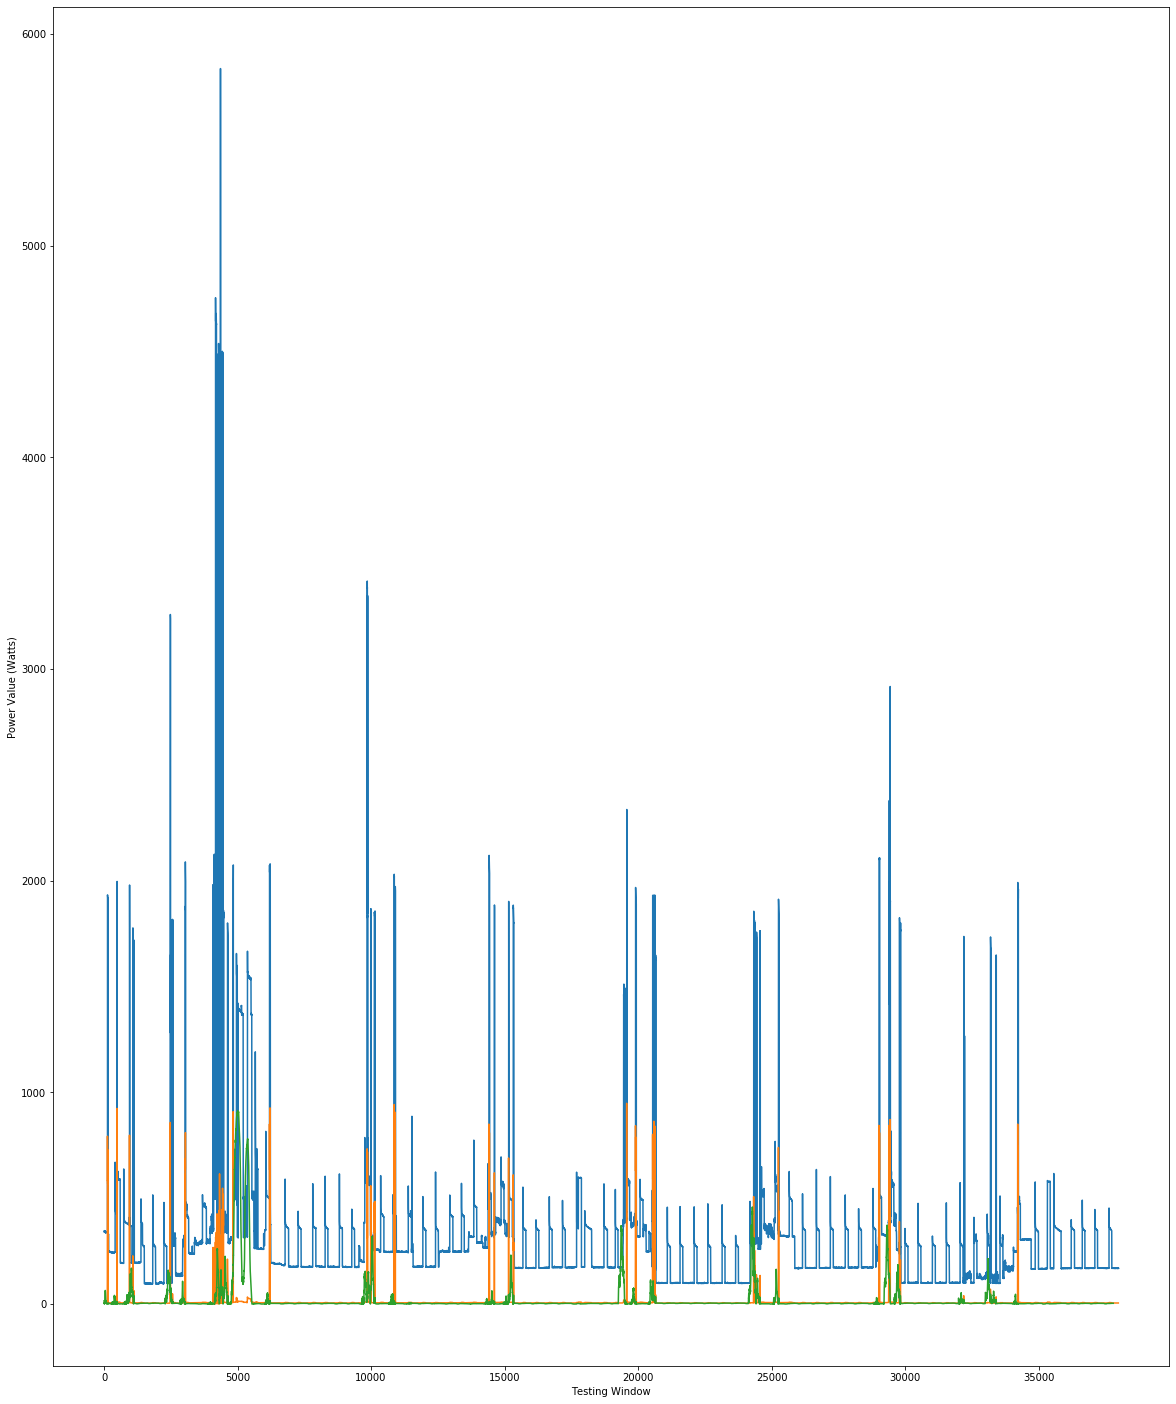

In [107]:

#mains = results
fig = plt.figure(figsize = [20,25])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['mains'], label="Mains")
ax1.plot(df['microwave'][:- (2 * offset_microwave)], label="Microwave")
ax1.plot(df['dishwasher'][:- (2 * offset_dishwasher)], label="Dishwasher")
#plt.title(self.__appliance + " " + self.__network_type + "(" + self.__algorithm + ")")
plt.ylabel("Power Value (Watts)")
plt.xlabel("Testing Window")

Text(0.5, 0, 'Testing Window')

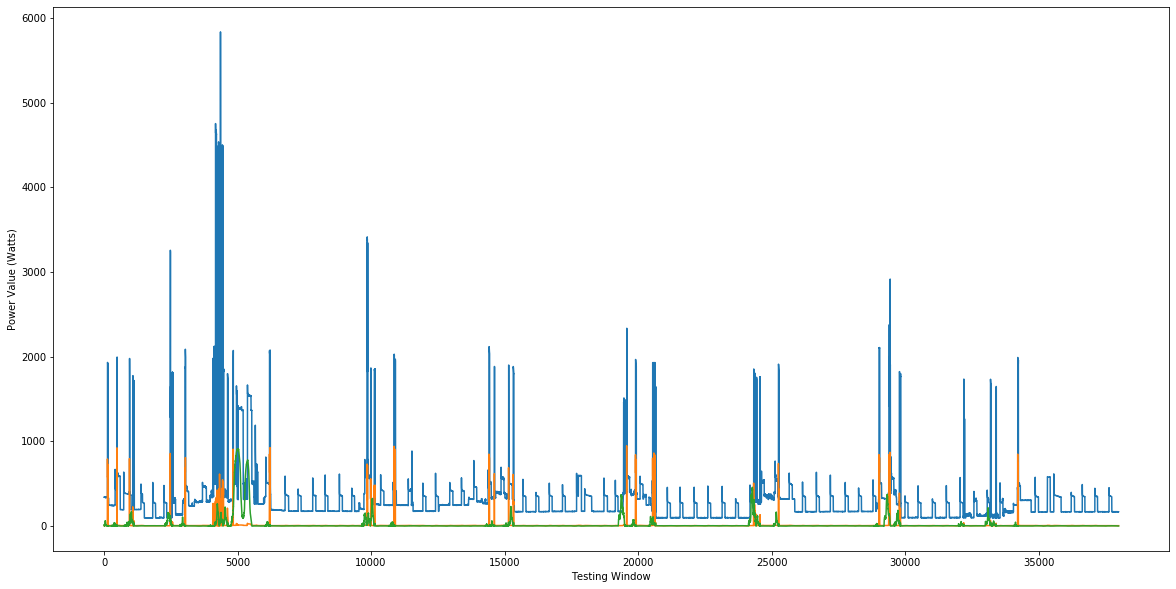

In [109]:
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['mains'], label="Mains")
ax1.plot(df['microwave'], label="Microwave")
ax1.plot(df['dishwasher'], label="Dishwasher")
#plt.title(self.__appliance + " " + self.__network_type + "(" + self.__algorithm + ")")
plt.ylabel("Power Value (Watts)")
plt.xlabel("Testing Window")

**Merge training data from houses 2,3 with house 4**

**Microwave**

In [56]:
#Combining houses 2,3 with 4-Dishwasher
PATH = '../../../trainingdata'
path_old = os.path.join(PATH, "REDDmicrowave_training_.csv")
path_new = os.path.join(PATH, "train_houses4/microwave_training_house4.csv")
df_old = pd.read_csv(path_old)
df_old.columns = ["mains", "appliance"]
df_old.describe()

,mains,appliance
count,300350.000000,300350.000000
mean,-0.208511,-0.610165
std,0.736927,0.130792
min,-0.601689,-0.625000
25%,-0.489410,-0.622500
50%,-0.329694,-0.620000
75%,-0.239883,-0.619167
max,8.755021,1.848750


In [57]:
df_new = pd.read_csv(path_new)
df_new.columns = ["mains", "appliance"]
df_new.describe()

,mains,appliance
count,408389.000000,408389.000000
mean,-0.221813,-0.623543
std,0.379762,0.000407
min,-0.557013,-0.625000
25%,-0.486671,-0.623750
50%,-0.344335,-0.623750
75%,-0.140450,-0.623333
max,3.755051,-0.600625


In [59]:
#Use this!
train = pd.DataFrame(columns=['mains', "appliance"])
train = train.append(df_old, ignore_index=True)
train = train.append(df_new, ignore_index=True)
train.describe()

,mains,appliance
count,708739.000000,708739.000000
mean,-0.216176,-0.617874
std,0.559718,0.085400
min,-0.601689,-0.625000
25%,-0.487357,-0.623750
50%,-0.339446,-0.623125
75%,-0.177381,-0.622500
max,8.755021,1.848750


In [60]:
train.to_csv(os.path.join(PATH, "microwave_training_234.csv"), index=False, header=False)

**Dishwasher**

In [52]:
#Combining houses 2,3 with 4-Dishwasher
PATH = '../../../trainingdata'
path_old = os.path.join(PATH, "REDDdishwasher_training_.csv")
path_new = os.path.join(PATH, "train_houses4/dishwasher_training_house4.csv")
df_old = pd.read_csv(path_old)
df_old.columns = ["mains", "appliance"]
df_old.describe()

,mains,appliance
count,300350.000000,300350.000000
mean,-0.208511,-0.691894
std,0.736927,0.081920
min,-0.601689,-0.700000
25%,-0.489410,-0.700000
50%,-0.329694,-0.700000
75%,-0.239883,-0.699000
max,8.755021,0.674500


In [53]:
df_new = pd.read_csv(path_new)
df_new.columns = ["mains", "appliance"]
df_new.describe()

,mains,appliance
count,204194.000000,204194.000000
mean,-0.221814,-0.699575
std,0.379763,0.000987
min,-0.557013,-0.700000
25%,-0.486670,-0.700000
50%,-0.344335,-0.700000
75%,-0.140451,-0.700000
max,3.755051,-0.671333


In [38]:
#Don't do this
df_alldata = pd.concat([df_old, df_new], axis = 0)
df_alldata.to_csv(os.path.join(PATH, "dishwasher_training_234.csv"))
df_alldata.describe()

,mains,appliance
count,504544.000000,504544.000000
mean,-0.213895,-0.695002
std,0.617810,0.063321
min,-0.601689,-0.700000
25%,-0.487784,-0.700000
50%,-0.337035,-0.700000
75%,-0.195888,-0.699000
max,8.755021,0.674500


In [54]:
#Use this!
train = pd.DataFrame(columns=['mains', "appliance"])
train = train.append(df_old, ignore_index=True)
train = train.append(df_new, ignore_index=True)
train.describe()

,mains,appliance
count,504544.000000,504544.000000
mean,-0.213895,-0.695002
std,0.617810,0.063321
min,-0.601689,-0.700000
25%,-0.487784,-0.700000
50%,-0.337035,-0.700000
75%,-0.195888,-0.699000
max,8.755021,0.674500


In [55]:
train.to_csv(os.path.join(PATH, "dishwasher_training_234.csv"), index=False, header=False)

**Microwave**

In [39]:
#Combining houses 2,3 with 4-Microwave
PATH = '../../../trainingdata'
path_old = os.path.join(PATH, "REDDmicrowave_training_.csv")
path_new = os.path.join(PATH, "train_houses4/microwave_training_house4.csv")
df_old = pd.read_csv(path_old)
df_old.columns = ["mains", "appliance"]
df_old.describe()

,mains,appliance
count,300350.000000,300350.000000
mean,-0.208511,-0.610165
std,0.736927,0.130792
min,-0.601689,-0.625000
25%,-0.489410,-0.622500
50%,-0.329694,-0.620000
75%,-0.239883,-0.619167
max,8.755021,1.848750


In [40]:
df_new = pd.read_csv(path_new)
df_new.columns = ["mains", "appliance"]
df_new.describe()

,mains,appliance
count,408389.000000,408389.000000
mean,-0.221813,-0.623543
std,0.379762,0.000407
min,-0.557013,-0.625000
25%,-0.486671,-0.623750
50%,-0.344335,-0.623750
75%,-0.140450,-0.623333
max,3.755051,-0.600625


In [41]:
df_alldata = pd.concat([df_old, df_new], axis = 0)

In [42]:
df_alldata.to_csv(os.path.join(PATH, "microwave_training_234.csv"))
df_alldata.describe()

,mains,appliance
count,708739.000000,708739.000000
mean,-0.216176,-0.617874
std,0.559718,0.085400
min,-0.601689,-0.625000
25%,-0.487357,-0.623750
50%,-0.339446,-0.623125
75%,-0.177381,-0.622500
max,8.755021,1.848750


In [19]:
#Combining REDD houses 2,3 with 4,5,6
PATH = '../../../trainingdata'
path_old = os.path.join(PATH, "REDDdishwasher_training_.csv")
path_new = os.path.join(PATH, "train_houses456/dishwasher_training_.csv")
df_old = pd.read_csv(path_old)
df_old.columns = ["mains", "appliance"]
df_old.describe()



,mains,appliance
count,300350.000000,300350.000000
mean,-0.208511,-0.691894
std,0.736927,0.081920
min,-0.601689,-0.700000
25%,-0.489410,-0.700000
50%,-0.329694,-0.700000
75%,-0.239883,-0.699000
max,8.755021,0.674500


In [20]:
df_new = pd.read_csv(path_new)
df_new.columns = ["mains", "appliance"]
df_new.describe()

,mains,appliance
count,343997.000000,343997.000000
mean,-0.126880,-0.693335
std,0.671331,0.089396
min,-0.557013,-0.700000
25%,-0.436391,-0.700000
50%,-0.318495,-0.700000
75%,-0.127167,-0.699500
max,7.492689,1.101500


In [21]:
df_alldata = pd.concat([df_old, df_new], axis = 0)

In [22]:
df_alldata.head()

,mains,appliance
0,-0.594218,-0.699000
1,-0.594211,-0.699667
2,-0.594240,-0.699000
3,-0.594295,-0.699000
4,-0.594297,-0.700000


In [28]:
df_alldata.to_csv(os.path.join(PATH, "dishwasher_training_all.csv"))
df_alldata.describe()

,mains,appliance
count,644347.000000,644347.000000
mean,-0.164931,-0.692663
std,0.703848,0.085995
min,-0.601689,-0.700000
25%,-0.474316,-0.700000
50%,-0.324275,-0.700000
75%,-0.162765,-0.699000
max,8.755021,1.101500


In [29]:
-0.692663*700 + 1000


515.1359

In [80]:
parser = argparse.ArgumentParser(description='sequence to point learning \
                                     example for NILM')
parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")

args = parser.parse_args()



In [81]:
args

Namespace(fff='/Users/shalinimustala/Library/Jupyter/runtime/kernel-298dcb4a-91c0-4a01-b6cc-87a59e41eb72.json')

In [82]:

DATA_DIRECTORY = '../../../rawdata/REDD'
SAVE_PATH = '../../../trainingdata/redd_kettle'
AGG_MEAN = 522
AGG_STD = 814
def get_arguments():
    parser = argparse.ArgumentParser(description='sequence to point learning \
                                     example for NILM')
    parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")
    parser.add_argument('--data_dir', type=str, default=DATA_DIRECTORY,
                          help='The directory containing the REDD data')
    parser.add_argument('--appliance_name', type=str, default='dishwasher',
                          help='which appliance you want to train: kettle,\
                          microwave,fridge,dishwasher,washingmachine')
    parser.add_argument('--aggregate_mean',type=int,default=AGG_MEAN,
                        help='Mean value of aggregated reading (mains)')
    parser.add_argument('--aggregate_std',type=int,default=AGG_STD,
                        help='Std value of aggregated reading (mains)')
    parser.add_argument('--save_path', type=str, default=SAVE_PATH,
                          help='The directory to store the training data')
    return parser.parse_args()


In [83]:
args = get_arguments()

In [84]:
start_time = time.time()
args  = get_arguments()
appliance_name = args.appliance_name
appliance_name


'dishwasher'

In [85]:
params_appliance

{'microwave': {'windowlength': 599,
  'on_power_threshold': 200,
  'max_on_power': 3969,
  'mean': 500,
  'std': 800,
  's2s_length': 128,
  'houses': [1, 2, 3],
  'channels': [11, 6, 16],
  'train_build': [2, 3],
  'test_build': 1},
 'fridge': {'windowlength': 599,
  'on_power_threshold': 50,
  'max_on_power': 3323,
  'mean': 200,
  'std': 400,
  's2s_length': 512,
  'houses': [1, 2, 3],
  'channels': [5, 9, 7],
  'train_build': [2, 3],
  'test_build': 1},
 'dishwasher': {'windowlength': 599,
  'on_power_threshold': 10,
  'max_on_power': 3964,
  'mean': 700,
  'std': 1000,
  's2s_length': 1536,
  'houses': [1, 2, 3],
  'channels': [6, 10, 9],
  'train_build': [2, 3],
  'test_build': 1},
 'washingmachine': {'windowlength': 599,
  'on_power_threshold': 20,
  'max_on_power': 3999,
  'mean': 400,
  'std': 700,
  's2s_length': 2000,
  'houses': [1, 2, 3],
  'channels': [20, 7, 13],
  'train_build': [2, 3],
  'test_build': 1}}

In [86]:
sample_seconds = 8
validation_percent = 10
nrows = None
debug = True

appliance_name = args.appliance_name
print('\n' + appliance_name)
train = pd.DataFrame(columns=['aggregate', appliance_name])
params_appliance = redd_parameters.params_appliance

#the code until appending all df_aligns to train if houses in training_houses and creating a test csv if houses in test set
#should be inside the for loop.
#I am taking it outside the for loop for sake of understanding the data and plotting
#for h in params_appliance[appliance_name]['houses']:
for h in [1]:
    print('    ' + args.data_dir + 'house_' + str(h) + '/'
                + 'channel_' +
                str(params_appliance[appliance_name]['channels'][params_appliance[appliance_name]['houses'].index(h)]) +
                '.dat')

        # read data
    mains1_df = pd.read_table(args.data_dir + '/' + 'house_' + str(h) + '/' + 'channel_' +
                                      str(1) + '.dat',
                                      sep="\s+",
                                      nrows=nrows,
                                      usecols=[0, 1],
                                      names=['time', 'mains1'],
                                      dtype={'time': str},
                                      )

    mains2_df = pd.read_table(args.data_dir + '/' + 'house_' + str(h) + '/' + 'channel_' +
                                      str(2) + '.dat',
                                      sep="\s+",
                                      nrows=nrows,
                                      usecols=[0, 1],
                                      names=['time', 'mains2'],
                                      dtype={'time': str},
                                      )
    app_df = pd.read_table(args.data_dir + '/' + 'house_' + str(h) + '/' + 'channel_' +
                                   str(params_appliance[appliance_name]['channels']
                                       [params_appliance[appliance_name]['houses'].index(h)]) + '.dat',
                                   sep="\s+",
                                   nrows=nrows,
                                   usecols=[0, 1],
                                   names=['time', appliance_name],
                                   dtype={'time': str},
                                   )


dishwasher
    ../../../rawdata/REDDhouse_1/channel_6.dat


/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: read_table is deprecated, use read_csv instead.
/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: read_table is deprecated, use read_csv instead.
/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: read_table is deprecated, use read_csv instead.


In [87]:
mains1_df['time'] = pd.to_datetime(mains1_df['time'], unit='s')
mains2_df['time'] = pd.to_datetime(mains2_df['time'], unit='s')

mains1_df.set_index('time', inplace=True)
mains2_df.set_index('time', inplace=True)

mains_df = mains1_df.join(mains2_df, how='outer')

mains_df['aggregate'] = mains_df.iloc[:].sum(axis=1)   #aggregate of 2 mains channels
        #resample = mains_df.resample(str(sample_seconds) + 'S').mean()

mains_df.reset_index(inplace=True)

In [88]:
del mains_df['mains1'], mains_df['mains2']

In [89]:
mains_sample = mains_df[["time", "aggregate"]]

In [90]:
mains_sample.columns = ["Time", "Mains Reading"]
mains_sample.head(10)

,Time,Mains Reading
0,2011-04-18 13:22:09,342.82
1,2011-04-18 13:22:10,344.56
2,2011-04-18 13:22:11,345.14
3,2011-04-18 13:22:12,341.68
4,2011-04-18 13:22:13,341.03
5,2011-04-18 13:22:14,340.80
6,2011-04-18 13:22:15,342.21
7,2011-04-18 13:22:16,342.36
8,2011-04-18 13:22:17,341.35
9,2011-04-18 13:22:18,341.81


    mains_df:
                 time  aggregate
0 2011-04-18 13:22:09     342.82
1 2011-04-18 13:22:10     344.56
2 2011-04-18 13:22:11     345.14
3 2011-04-18 13:22:12     341.68
4 2011-04-18 13:22:13     341.03


/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


app_df:
                 time  dishwasher
0 2011-04-18 13:22:13         0.0
1 2011-04-18 13:22:16         0.0
2 2011-04-18 13:22:20         0.0
3 2011-04-18 13:22:23         1.0
4 2011-04-18 13:22:26         0.0


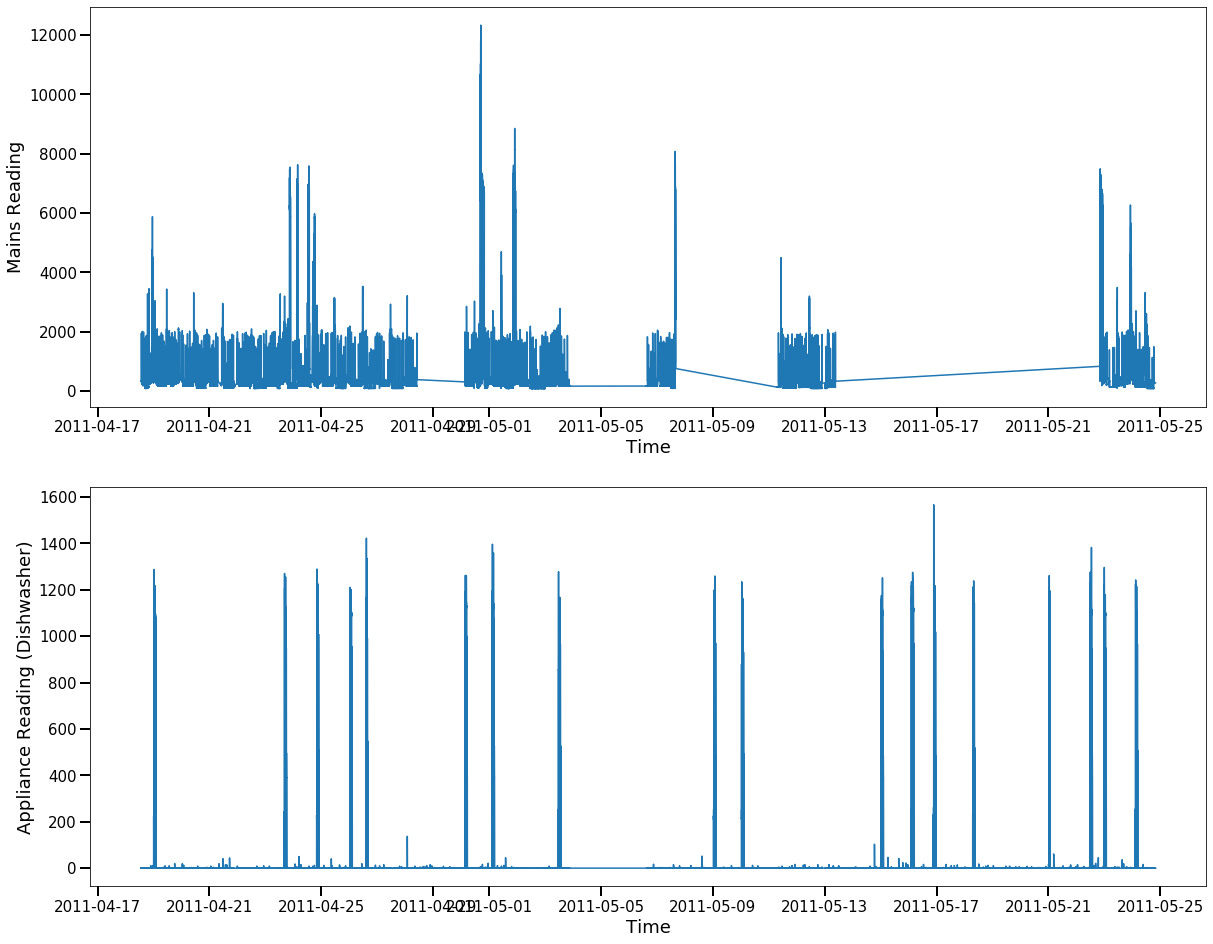

In [91]:

if debug:
    print("    mains_df:")
    print(mains_df.head())
    fig = plt.figure(figsize = [20,25])
    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(mains_df['time'], mains_df['aggregate'])
    ax1.tick_params(direction='out', length=10, width=2, labelsize = 15)
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Mains Reading", fontsize=18)

app_df['time'] = pd.to_datetime(app_df['time'], unit='s')
            # app_df.columns = [appliance_name]
if debug:
    print("app_df:")
    print(app_df.head())
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(app_df['time'], app_df[appliance_name])
    ax2.tick_params(length=10, width=2, labelsize = 15)
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Appliance Reading (Dishwasher)", fontsize=18)
    
    
plt.show()

In [92]:
mains_df.set_index('time', inplace=True)
app_df.set_index('time', inplace=True)

In [93]:
print(mains_df.count())   
print("Nans in mains readings: {}".format(pd.isna(mains_df['aggregate']).sum()))
mains_df.head() 
mains_df.tail()

aggregate    1561660
dtype: int64
Nans in mains readings: 0


,aggregate
time,
2011-05-24 19:56:58,273.16
2011-05-24 19:56:59,274.10
2011-05-24 19:57:00,273.39
2011-05-24 19:57:01,274.26
2011-05-24 19:57:02,274.27


In [94]:
1427284/60/60/24

16.51949074074074

**Mains_df has readings every second**
<br> No Nans
<br> Start Time: 2011-04-16 05:11:27 (for house 3)
<br> End Time: 2011-05-31 00:19:54 (for house 3)
<br> Total Number of readings: 1427284


In [95]:
print(app_df.count())  #dishwasher
print("Nans in apps readings: {}".format(pd.isna(app_df[appliance_name]).sum()))
app_df.head(20)
app_df.tail()




dishwasher    745878
dtype: int64
Nans in apps readings: 0


,dishwasher
time,
2011-05-24 19:56:20,1.0
2011-05-24 19:56:23,0.0
2011-05-24 19:56:27,0.0
2011-05-24 19:56:30,0.0
2011-05-24 19:56:34,0.0


**app_df has readings every 3 or 4 seconds, there are readings more spaced than 4 seconds**
<br>No Nans
<br>Start Time: 2011-04-16 05:11:30	 (for house 3)
<br>End Time: 2011-05-31 00:19:36 (for house 3)
<br>Total Number of readings: 404107

In [96]:
mains_df.join(app_df, how='outer'). \
                resample(str(sample_seconds) + 'S').mean().fillna(method='backfill', limit=1).isna().sum()

aggregate     194655
dishwasher     33496
dtype: int64

time          197063
aggregate     197063
dishwasher    197063
dtype: int64


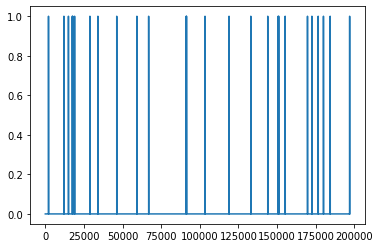

In [97]:
df_align = mains_df.join(app_df, how='outer'). \
                resample(str(sample_seconds) + 'S').mean().fillna(method='backfill', limit=1)   #sample_seconds = 8 sec
df_align = df_align.dropna()
df_align.reset_index(inplace=True)
print(df_align.count())
df_align['OVER 5 MINS'] = (df_align['time'].diff()).dt.seconds > 9   #to check how many readings are more than 9 seconds apart
plt.plot(df_align['OVER 5 MINS'])
plt.show() 

In [98]:
df_align[df_align["OVER 5 MINS"] == True].count()

time           37
aggregate      37
dishwasher     37
OVER 5 MINS    37
dtype: int64

In [99]:
df_align[(df_align['time'].diff()).dt.seconds > 5*60]

,time,aggregate,dishwasher,OVER 5 MINS
14987,2011-04-20 00:20:00,390.932500,0.0,True
28904,2011-04-21 10:17:12,176.366667,0.0,True
34063,2011-04-21 23:41:20,268.971429,0.0,True
103411,2011-04-30 03:10:24,313.885000,0.0,True
144025,2011-05-06 14:51:36,172.218000,0.0,True
155308,2011-05-11 07:19:36,136.990000,0.0,True
172620,2011-05-13 00:14:16,271.320000,0.0,True
176687,2011-05-22 20:04:40,837.315000,0.0,True
184448,2011-05-23 14:31:20,223.425000,0.0,True
197054,2011-05-24 19:55:28,274.713333,0.0,True


In [100]:
print(df_align.count())  #merged mains and app
print("Nans in merged and resampled readings (just a check, nans already backfilled and removed): {}".format(pd.isna(df_align).sum()))
df_align.head()
df_align.tail()

time           197063
aggregate      197063
dishwasher     197063
OVER 5 MINS    197063
dtype: int64
Nans in merged and resampled readings (just a check, nans already backfilled and removed): time           0
aggregate      0
dishwasher     0
OVER 5 MINS    0
dtype: int64


,time,aggregate,dishwasher,OVER 5 MINS
197058,2011-05-24 19:56:00,273.28000,0.500000,False
197059,2011-05-24 19:56:08,273.71625,1.000000,False
197060,2011-05-24 19:56:16,273.79375,0.666667,False
197061,2011-05-24 19:56:24,274.59750,0.000000,False
197062,2011-05-24 19:56:32,274.41125,0.000000,False


**df_align is a merged df of mains and app, resampled to 1 reading in 8 seconds, missing values filled by backfilling.**
<br> missing values: not all timesteps in the appliance timeseries (may be in mains df too) are not spaced <= 8 seconds. Therefore resampling to 8 sec creates some missing values
<br> these missing values are filled by backfilling
<br> but wherever the time gap is more 16 seconds,i.e., more than 2 consecutive Nans, backfilling doesn't remove all the NaNs. Backfilling is only to interpolate the missing values caused due to different timestamps of mains and appliance
<br> Nan readings after backfilling: 299776 (27.7 days),
<br> these rows with NaNs (because of the occurence of higher time gaps between timestamps) are droped using dropna method 
<br> Total Number of readings after dropna: 183543
<br> Start time: 2011-04-16 05:11:20	
End time: 2011-05-31 00:19:36
<br> Although start and end dates and 45 days apart. The dataset has data only during the dates in set(all_dates): 26 days
<br> Since the data recorded during these dates is also not at regular intervals, 
<br> it's actually only around 17 days worth of data.

In [101]:

df_align["time"].dt.day.unique()  #looks like it has data only in these dates in April and May

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30,  1,  2,  3,  6,  7,
       11, 12, 13])

In [ ]:
all_dates = []
for i in range(len(df_align)):
    all_dates.append((df_align.iloc[i]["time"].month, df_align.iloc[i]["time"].day))
set(all_dates)

In [23]:
183543*8/60/60/24  #It's only around 17 days worth of data.  

16.994722222222222

In [24]:
299776*8/60/60/24  #after resampling and backfilling (before removing nans)  ---> Gaps

27.757037037037037

In [25]:
df_align.iloc[183542]['time'] - df_align.iloc[0]['time']

Timedelta('44 days 19:08:16')

In [27]:
44 + 19/24

44.791666666666664

In [29]:
dropout_rate = 16.994/44.792
dropout_rate 

0.37939810680478653

In [33]:
#dropout rate ignoring gaps
dr_ig = 16.994/(44.792 - 27.757)
dr_ig

0.9975931904901673

df_align:
                 time   aggregate  dishwasher  OVER 5 MINS
0 2011-04-18 13:22:08  342.605714    0.000000        False
1 2011-04-18 13:22:16  341.768750    0.333333        False
2 2011-04-18 13:22:24  341.282500    0.000000        False
3 2011-04-18 13:22:32  342.117500    0.000000        False
4 2011-04-18 13:22:40  343.427500    0.000000        False


/Users/shalinimustala/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


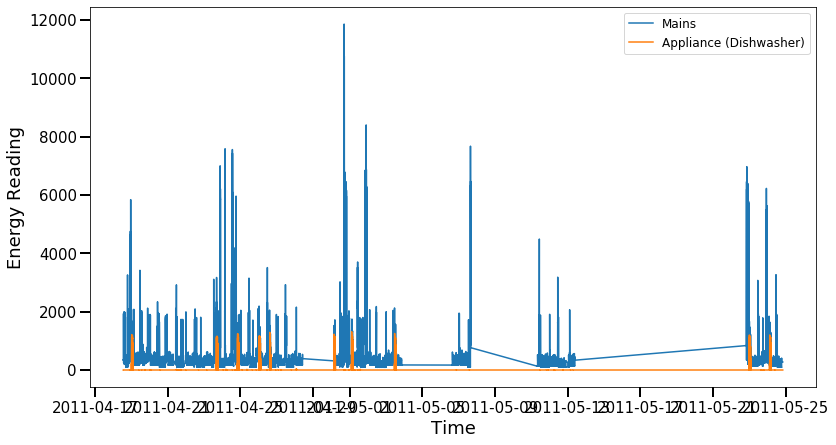

In [102]:
mains = df_align['aggregate'].values
app_data = df_align[appliance_name].values
# plt.plot(np.arange(0, len(mains)), mains, app_data)
# plt.show()
if debug:
# plot the dtaset
    print("df_align:")
    print(df_align.head())
    fig2 = plt.figure(figsize = [13,7])
    ax2 = fig2.add_subplot(1,1,1)
    ax2.plot(df_align['time'], df_align['aggregate'])
    ax2.plot(df_align['time'], df_align[appliance_name])
    ax2.tick_params(direction='out', length=10, width=2, labelsize = 15)
    ax2.legend(["Mains", "Appliance (Dishwasher)"], fontsize = "large")
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Energy Reading", fontsize=18)
    #plt.plot(df_align['aggregate'].values)
    #plt.plot(df_align[appliance_name].values)  #make the plot time (date) vs readings
    plt.show()

**Normalization** : explains the negative values

In [139]:
# Normalization
mean = params_appliance[appliance_name]['mean']
std = params_appliance[appliance_name]['std']

df_align['aggregate'] = (df_align['aggregate'] - args.aggregate_mean) / args.aggregate_std
df_align[appliance_name] = (df_align[appliance_name] - mean) / std

In [140]:
df_align.head()

,time,aggregate,dishwasher,OVER 5 MINS
0,2011-04-16 05:11:20,-0.640923,-0.700699,False
1,2011-04-16 05:11:28,-0.640920,-0.700699,False
2,2011-04-16 05:11:36,-0.640921,-0.700700,False
3,2011-04-16 05:11:44,-0.640920,-0.700699,False
4,2011-04-16 05:11:52,-0.640918,-0.700700,False


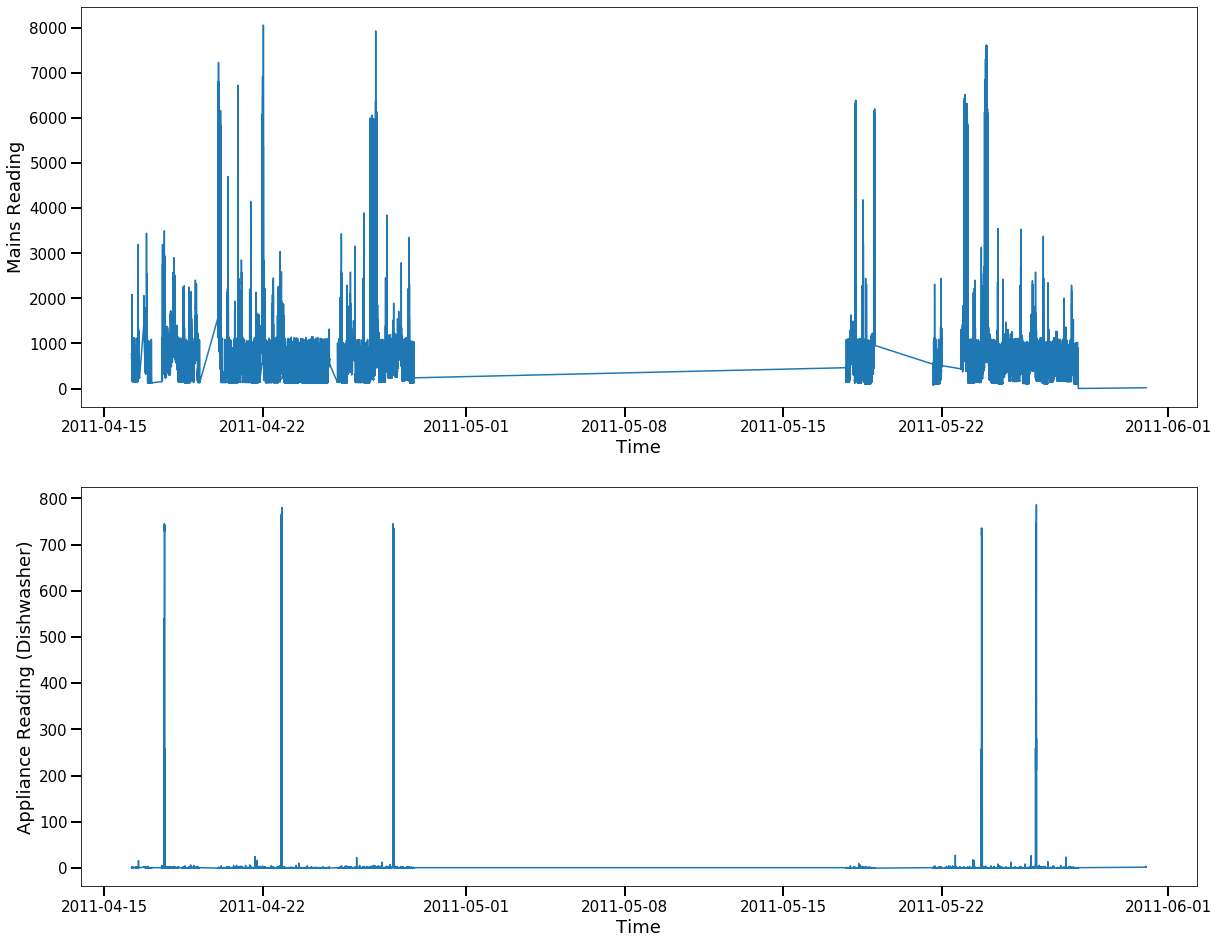

In [162]:
fig

In [10]:
import os
os.getcwd()
import pandas as pd

In [11]:
df_trainset = pd.read_csv("../../../trainingdata/REDDmicrowave_training_.csv")

In [12]:
df_trainset.head()

,-0.5942183660933661,-0.62
0,-0.594218,-0.620000
1,-0.594211,-0.619583
2,-0.594240,-0.620000
3,-0.594295,-0.620000
4,-0.594297,-0.620000


In [23]:
df_trainset.count()

-0.5942183660933661    300350
-0.62                  300350
dtype: int64

In [19]:
df_testset = pd.read_csv("../../../trainingdata/REDDmicrowave_test_.csv")

In [20]:
df_testset.count()

-0.22038610038610035    197062
-0.61875                197062
dtype: int64

In [26]:
21*8/60

2.8

In [6]:
11*8/60

1.4666666666666666

In [7]:
51*8/60

6.8

In [24]:
int((0.5 * 601) - 1)

299

In [25]:
299*8/60

39.86666666666667

In [27]:
import time
now = time.ctime(int(time.time()))
print(now)
time.sleep(3)
now = time.ctime(int(time.time()))
print(now)

Tue Apr  6 11:57:20 2021
Tue Apr  6 11:57:23 2021


In [29]:
15*60


900

In [33]:
30*11*8

2640

In [31]:
7230 /330

21.90909090909091

In [35]:
7200/300

24.0

In [36]:
30*30*8

7200

In [37]:
30*40*6

7200

In [38]:
40*50*5

10000

In [39]:
0.0355 * 800

28.4

In [ ]:
0.0355*800 

In [40]:
mse =  0.0470
RMSE = mse**0.5

In [41]:
#Microwave
RMSE_in_watts = RMSE*800

In [42]:
RMSE_in_watts

173.4358671094304

In [43]:
RMSE

0.216794833886788

In [ ]:
 0.0453
rmse =  0.0453**0.5

In [ ]:
rmse*800

Dishwasher

In [44]:
0.0312*1000


31.2

In [4]:
mse = 0.0104
RMSE = mse**0.5

In [5]:
RMSE*1000

101.9803902718557

In [112]:
#Stove
mse = 1.7241
#mse = 1.6644
rmse = mse**0.5

In [117]:
rmse*(50.75**0.5)

16.834131994255003

In [114]:
#Kitcehn outlet
mse = 5.5840
rmse = mse**0.5

In [116]:
rmse*(28.16**0.5)

12.53975438355951

In [120]:
#microwave
mse = 0.0380
rmse = (mse)**0.5
rmse*800

155.9487095169434

In [121]:
#Improvement over baseline
(312.8- 25.84)/312.8

0.9173913043478261